<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## For the "Median value of owner-occupied homes" provide a boxplot

In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


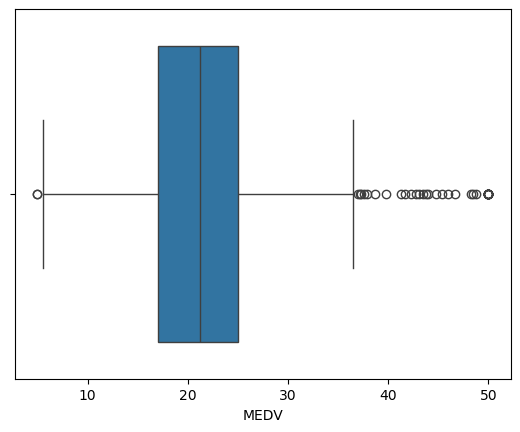

In [13]:
ax = sns.boxplot(x='MEDV', data=boston_df)
show_title = ('Median value of owner-occupied homes')

### QUESTION 1) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [44]:

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)


TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

#### There is statistically significant difference in mean house values between houses bounded by the Charles River and those not bounded by it.

## Provide a  bar plot for the Charles river variable

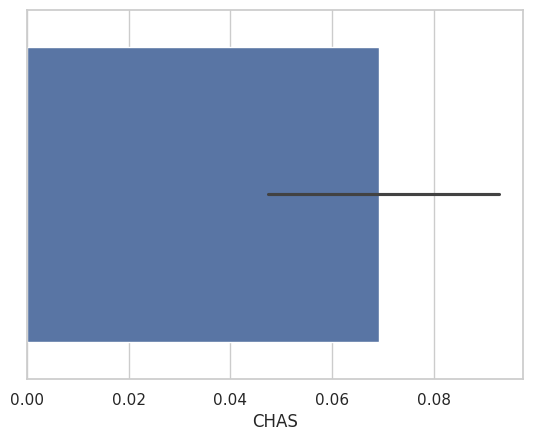

In [15]:
sns.set(style="whitegrid")
ax = sns.barplot(x="CHAS", data=boston_df)



## Provide a boxplot for the MEDV variable vs the AGE variable. (## Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

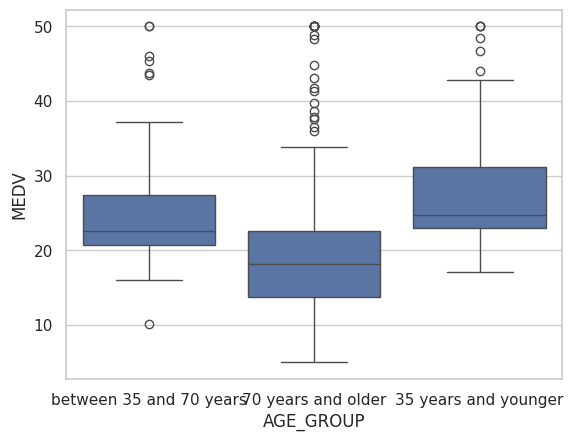

In [32]:

boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] 
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] 
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] 
ax=sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)


## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



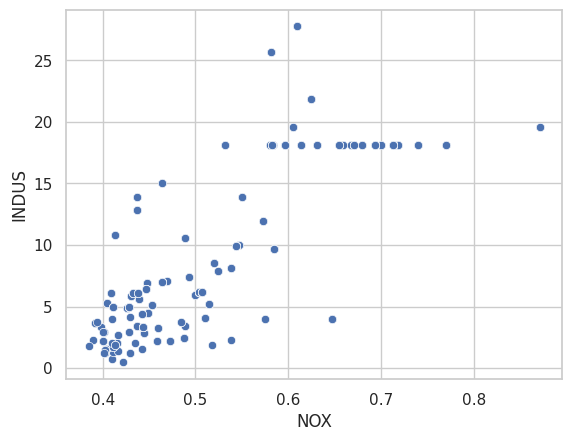

In [35]:
ax= sns.scatterplot (x='NOX', y='INDUS', data= boston_df)

### QUESTION 2) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [45]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

### yes, there is correlation between both variables because the p-value < 0.05


## Create a histogram for the pupil to teacher ratio variable

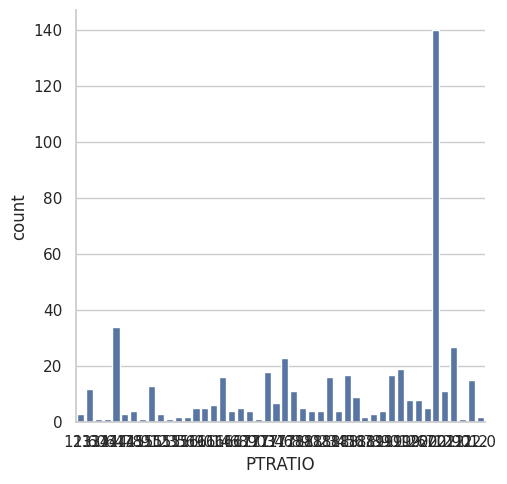

In [38]:
ax=sns.catplot (x='PTRATIO', kind='count', data= boston_df)

### QUESTION 3) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [49]:
forty_lower_MEDV = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
forty_fiftyseven_MEDV = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
fiftyseven_older_MEDV = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(forty_lower_MEDV, forty_fiftyseven_MEDV, fiftyseven_older_MEDV)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


### p-value < 0.05 so, there is differnce in MEDV for each each proportion of owner occupied units built prior to 1940 (AGE)

### QUESTION 4) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [51]:

X = boston_df['DIS']

y = boston_df['MEDV']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        01:43:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### since p-value is less then 0.05 hence, ther is no significance relationship between both variables